<h2>Predicting Appendicitis</h2>

Appendicitis is a common issue affecting most of the people . It is an inflammation of the appendix organ at the end of the large intestine. Hence when it gets inflamed, then the disease is called appendicitis. Although the reason for its inflammation is not known, sometimes it can be caused due to blockage of the intestine with bowels due to constipation or due to consumption of vegetable or fruit seeds.The only cure to it is surgically removing the organ. The removal of the organ has no affects on the human working as it is a vestige organ.
    <P><B>Problem Statement:</B>To predict from the symptoms of a patient whether he needs surgery or not basically whether he has appendicitis or not
     

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

<h4>Data Preparation</h4>

In [5]:
df=pd.read_csv("appendix.csv")
df.head(10)

,Gender,Age,DrinkWater,Stalefood,UrineCondition,Fever,FeverRuns,Appetite,PassingGas,BellyPain,Abdominalpain,PainQualification,FamilyHistory,Diarrhea,Vomiting,RateOFNausea,MigrationPain,Surgery
0,Female,31 to above,Yes,Yes,Critical,Yes,3 to 5 times,Yes,No,Yes,No,High,None,No,No,Normal,Yes,Yes
1,Male,31 to above,Yes,No,Normal,Yes,More than above,Yes,No,Yes,Yes,Medium,Brother or Sister,No,Yes,Not tolerable,Yes,Yes
2,Male,Between 10 to 30,No,Yes,Partial,Yes,3 to 5 times,Yes,No,Yes,Yes,Medium,None,No,Yes,So much,No,Yes
3,Female,31 to above,Yes,No,Normal,Yes,More than above,Yes,No,Yes,Yes,High,Mother,No,Yes,Little Bit,No,Yes
4,Female,31 to above,Yes,Yes,Normal,No,3 to 5 times,Yes,No,Yes,No,Medium,Mother Cast,No,Yes,Normal,Yes,Yes
5,Male,31 to above,No,Yes,Critical,No,More than above,Yes,No,No,Yes,Medium,None,No,No,Little Bit,Yes,Yes
6,Female,Between 10 to 30,Yes,No,Normal,Yes,Less than 2,No,No,No,Yes,Medium,None,No,No,Little Bit,No,Yes
7,Female,Between 10 to 30,No,No,Normal,Yes,Less than 2,No,No,Yes,Yes,High,None,Yes,Yes,So much,Yes,Yes
8,Male,Between 10 to 30,No,Yes,Critical,No,More than above,Yes,No,Yes,Yes,High,None,No,No,Normal,No,Yes
9,Male,Between 10 to 30,Yes,Yes,Partial,Yes,Less than 2,Yes,No,Yes,No,Low,None,No,No,Little Bit,No,Yes


In [6]:
df.tail()

,Gender,Age,DrinkWater,Stalefood,UrineCondition,Fever,FeverRuns,Appetite,PassingGas,BellyPain,Abdominalpain,PainQualification,FamilyHistory,Diarrhea,Vomiting,RateOFNausea,MigrationPain,Surgery
195,Male,Between 10 to 30,Yes,No,Normal,Yes,None,No,Yes,No,No,None,Mother Cast,No,Yes,None,No,No
196,Male,Between 10 to 30,No,No,Normal,No,None,No,Yes,No,No,None,Father Cast,No,No,None,No,No
197,Male,31 to above,Yes,No,Normal,No,None,No,Yes,No,No,None,None,No,No,None,No,No
198,Female,31 to above,No,No,Normal,Yes,None,No,Yes,No,No,None,Brother or Sister,No,No,None,No,No
199,Female,Between 1 to 9,No,No,Normal,Yes,None,No,Yes,No,No,None,Brother or Sister,Yes,No,None,No,No


In [7]:
df.shape

(200, 18)

<h4>Training and Testing Data</h4>

In [8]:
#Training set
X=df[['Gender','DrinkWater','Stalefood','UrineCondition','Fever','FeverRuns','Appetite','PassingGas','BellyPain','Abdominalpain','PainQualification','Diarrhea','Vomiting','RateOFNausea','MigrationPain']].values
X[0:5]

array([['Female', 'Yes', 'Yes', 'Critical', 'Yes', '3 to 5 times', 'Yes',
        'No', 'Yes', 'No', 'High', 'No', 'No', 'Normal', 'Yes'],
       ['Male', 'Yes', 'No', 'Normal', 'Yes', 'More than above', 'Yes',
        'No', 'Yes', 'Yes', 'Medium', 'No', 'Yes', 'Not tolerable',
        'Yes'],
       ['Male', 'No', 'Yes', 'Partial', 'Yes', '3 to 5 times', 'Yes',
        'No', 'Yes', 'Yes', 'Medium', 'No', 'Yes', 'So much', 'No'],
       ['Female', 'Yes', 'No', 'Normal', 'Yes', 'More than above', 'Yes',
        'No', 'Yes', 'Yes', 'High', 'No', 'Yes', 'Little Bit', 'No'],
       ['Female', 'Yes', 'Yes', 'Normal', 'No', '3 to 5 times', 'Yes',
        'No', 'Yes', 'No', 'Medium', 'No', 'Yes', 'Normal', 'Yes']],
      dtype=object)

In [9]:
#converting categorial features to numerical values
from sklearn import preprocessing
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Female','Male'])
X[:,0] = le_gender.transform(X[:,0]) 


le_drinkwater = preprocessing.LabelEncoder()
le_drinkwater.fit(['Yes','No'])
X[:,1] = le_drinkwater.transform(X[:,1]) 

le_stalefood = preprocessing.LabelEncoder()
le_stalefood.fit(['Yes','No'])
X[:,2] = le_stalefood.transform(X[:,2]) 

le_urinecondition = preprocessing.LabelEncoder()
le_urinecondition.fit(['Normal','Partial','Critical'])
X[:,3] = le_urinecondition.transform(X[:,3]) 

le_fever = preprocessing.LabelEncoder()
le_fever.fit(['Yes','No'])
X[:,4] = le_fever.transform(X[:,4]) 

le_feverruns = preprocessing.LabelEncoder()
le_feverruns.fit(['None','Less than 2','3 to 5 times','More than above'])
X[:,5] = le_feverruns.transform(X[:,5]) 

le_apetite = preprocessing.LabelEncoder()
le_apetite.fit(['Yes','No'])
X[:,6] = le_apetite.transform(X[:,6]) 

le_passinggas = preprocessing.LabelEncoder()
le_passinggas.fit(['Yes','No'])
X[:,7] = le_stalefood.transform(X[:,7]) 

le_bellypain = preprocessing.LabelEncoder()
le_bellypain.fit(['Yes','No'])
X[:,8] = le_bellypain.transform(X[:,8]) 

le_abdominpain = preprocessing.LabelEncoder()
le_abdominpain.fit(['Yes','No'])
X[:,9] = le_abdominpain.transform(X[:,9]) 

le_PainQualification = preprocessing.LabelEncoder()
le_PainQualification.fit([ 'None', 'Low','Medium','High'])
X[:,10] = le_PainQualification.transform(X[:,10])

le_diarhoea = preprocessing.LabelEncoder()
le_diarhoea.fit(['Yes','No'])
X[:,11] = le_diarhoea.transform(X[:,11]) 

le_vomiting = preprocessing.LabelEncoder()
le_vomiting.fit(['Yes','No'])
X[:,12] = le_vomiting.transform(X[:,12]) 

le_rateofnausea = preprocessing.LabelEncoder()
le_rateofnausea.fit(['None','Normal','Little Bit','So much','Not tolerable'])
X[:,13] = le_rateofnausea.transform(X[:,13]) 

le_migrationpain = preprocessing.LabelEncoder()
le_migrationpain.fit(['Yes','No'])
X[:,14] = le_migrationpain.transform(X[:,14]) 





X[0:5]

array([[0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1],
       [1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 3, 1],
       [1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 4, 0],
       [0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1]], dtype=object)

In [10]:
#output to be predicted
y=df['Surgery']
y[0:5]

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Surgery, dtype: object

<h5>Train-Test Split</h5>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h4>Decision Tree</h4>

In [13]:
#Decision tree classifier library
from sklearn.tree import DecisionTreeClassifier

In [84]:
surgery = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
surgery

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
surgery.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
predTree = surgery.predict(X_testset)

In [87]:
print (predTree [0:5])
print (y_testset [0:5])

['Yes' 'Yes' 'No' 'No' 'No']
40     Yes
51     Yes
139     No
197     No
170     No
Name: Surgery, dtype: object


<h5>Accuracy Metrics for Decision Tree Classifier:</h5>

In [88]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn import metrics

In [89]:
print("Jaccard index: %.2f" % jaccard_similarity_score(y_testset, predTree))

Jaccard index: 1.00


In [90]:
print("F1-score: %.2f" % f1_score(y_testset, predTree, average='weighted') )

F1-score: 1.00


<h5>Logistic Regression</h5>

In [70]:
#logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
yhat = LR.predict(X_testset)
yhat[0:5]

array(['Yes', 'No', 'No', 'No', 'No'], dtype=object)

In [72]:
yhat_prob = LR.predict_proba(X_testset)
yhat_prob[0:5]

array([[0.39076354, 0.60923646],
       [0.63763979, 0.36236021],
       [0.73933982, 0.26066018],
       [0.76802916, 0.23197084],
       [0.74913367, 0.25086633]])

<h5>Accuracy Metrics for Logistic Regression Classifier:</h5>

In [73]:
print("Jaccard index: %.2f" % jaccard_similarity_score(y_testset, yhat))

Jaccard index: 0.87


In [74]:
print("LogLoss: %.2f" % log_loss(y_testset, yhat_prob))

LogLoss: 0.45


In [75]:
print("F1-score: %.2f" % f1_score(y_testset, yhat, average='weighted') )

F1-score: 0.86


<h4>K-Nearest Neighbor</h4>


In [51]:
#importing K-Nearest Neighbor Classifier library
from sklearn.neighbors import KNeighborsClassifier

<h6>Finding the best value of k for prediction:</h6>

In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93333333, 0.93333333, 0.96666667, 0.96666667, 0.95      ,
       0.93333333, 0.93333333, 0.91666667, 0.93333333])

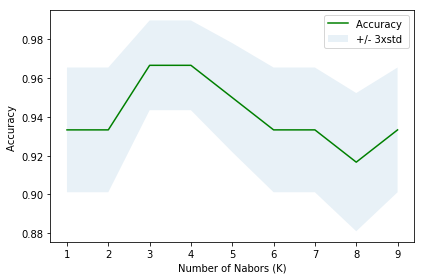

In [53]:
#Visualizing the different values of k and their accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9666666666666667 with k= 3


In [55]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array(['Yes', 'Yes', 'No', 'No', 'No'], dtype=object)

<h5>Accuracy Metrics for K-Nearest Neighbor Classifier:</h5>

In [57]:
print("Jaccard index: %.2f" % jaccard_similarity_score(y_testset, yhat))


KNN Jaccard index: 0.97


In [58]:
print("F1-score: %.2f" % f1_score(y_testset, yhat, average='weighted') )

KNN F1-score: 0.97


<h4>Support Vector Machine(SVM)</h4>

In [63]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

C:\Users\Rakshinda Sarah Zama\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
yhat = clf.predict(X_testset)
yhat [0:5]

array(['Yes', 'Yes', 'No', 'No', 'No'], dtype=object)

<h5>Accuracy Metrics for SVM:</h5>

In [67]:
print("Jaccard index: %.2f" % jaccard_similarity_score(y_testset, yhat))


Jaccard index: 0.95


In [68]:
print("F1-score: %.2f" % f1_score(y_testset, yhat, average='weighted') )

F1-score: 0.95


<h4>Comparison of Classification Model</h4>

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.97    | 0.97     | NA      |
| Decision Tree      | 1.00    | 1.00     | NA      |
| SVM                | 0.95    | 0.95     | NA      |
| LogisticRegression | 0.87    | 0.45     | 0.86    |

<h4>Result:</h4>
From the above comparison,we see that the Decision Tree Classifier gives 100% accuracy followed by the K-Nearest Neighbors Classifier with 97% accuracy